In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = {
    'mother_height':[58,62,60,64,67,70],
    'daughter_height':[60,60,58,60,70,72]
}

In [4]:
df = pd.DataFrame(data)
df

,mother_height,daughter_height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [96]:
def forwardprop(data, param):
    y = []
    temp =0
    X = data.to_numpy()
    b = param[-1]
    W = param[:-1]
    Y = X@ (W.T) + b
    return Y
    
        
        

In [195]:
def grad_descent(data, param, y_pred,erros, show_cost =False):
    y_act = data.iloc[:,-1].to_numpy()
    err = np.sum((y_act - y_pred)**2) / len(y_act)
    erros.append(err)
    if show_cost:
        print("error: ", err)
    grads = []
    #temp = (y_act-y_pred)
    temp = (y_pred-y_act)
    for i in data.iloc[:,:-1].columns:
        X = data[i]
        dJ_dw = np.dot(temp, X)/len(y_act)
        grads.append(dJ_dw)
    dJ_db = np.sum((temp))/len(y_act)
    grads.append(dJ_db)
    return np.array(grads)

In [198]:
def backprop(data, param, grads, lr= 0.01):
    param = param- lr *grads
    return param

In [201]:
def model(df, epochs, learn =0.01, shcost =False):
    params =[]
    errors = []
    for i in df.iloc[:,:-1].columns:
        params.append(np.random.rand())
    params.append(np.random.rand())
    params = np.array(params)
    for i in range(epochs):
        Y_pred = forwardprop(df.iloc[:,:-1], params)
        grads = grad_descent(df, params, Y_pred,errors,   show_cost =shcost)
        params = backprop(df, params, grads, lr =learn)
        print(params)
    return params, errors
    

In [202]:
params, errors = model(df, 10, learn =0.0001, shcost =True)

error:  1937.5651796252212
[0.57928759 0.51372438]
error:  690.42889946063
[0.74564822 0.51632786]
error:  248.8861345218614
[0.84463567 0.51787469]
error:  92.55998420330671
[0.90353493 0.5187928 ]
error:  37.21344173650109
[0.93858103 0.51933681]
error:  17.618256936817932
[0.95943409 0.51965822]
error:  10.680673035318582
[0.97184205 0.51984718]
error:  8.224453505753106
[0.97922504 0.51995733]
error:  7.354840063358829
[0.98361808 0.52002059]
error:  7.046957082253318
[0.98623205 0.52005595]


In [203]:
Y_pred = forwardprop(df.iloc[:,:-1], params)
Y_pred

array([57.72151478, 61.66644297, 59.69397888, 63.63890707, 66.59760322,
       69.55629937])

In [204]:
y_act = df.iloc[:,-1].to_numpy()
mse = np.sum((y_act - Y_pred)**2) / len(y_act)
print('MSE: ', mse)
print('RMSE: ', mse**0.5)

MSE:  6.937952142579416
RMSE:  2.633999267763645


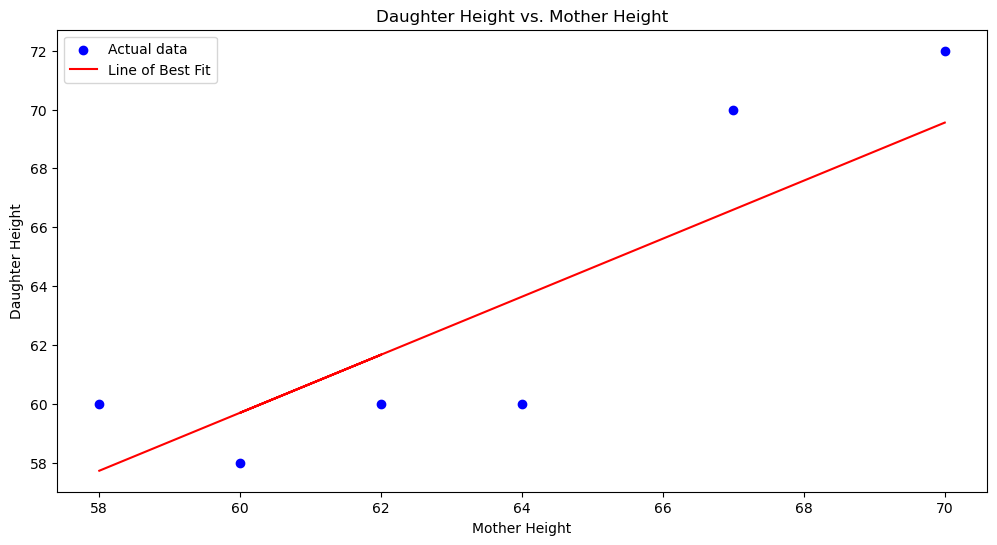

In [205]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
    
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual data')
y_pred = forwardprop(df.iloc[:, :-1], params)
plt.plot(X, y_pred, color='red', label='Line of Best Fit')

plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Daughter Height vs. Mother Height')
plt.legend()
plt.show()

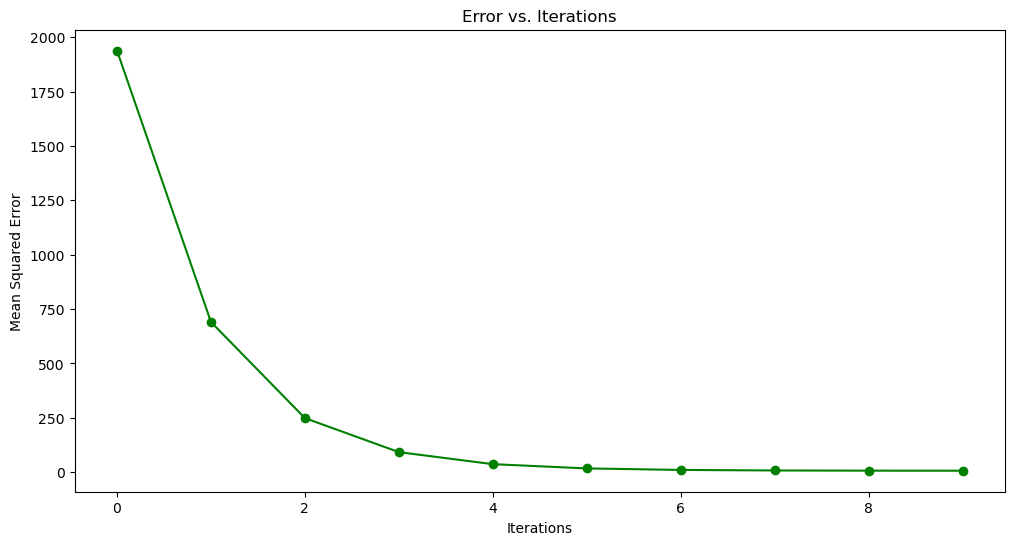

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(errors, color='green', marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Iterations')
plt.show()